In [1]:
import pandas as pd
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [2]:
train_data = pd.read_csv('train_modified.csv') # Important!!
print(train_data.shape)
train_data.head()

/home/tintash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.



(903653, 56)


,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [3]:
#Verify that campaign code is useless
column = train_data['trafficSource.campaignCode']
new_col = column.dropna()
print(new_col)

61493    11251kjhkvahf
Name: trafficSource.campaignCode, dtype: object


In [4]:
#Print all the column names
print(train_data.columns.values)

['Unnamed: 0' 'channelGrouping' 'date' 'fullVisitorId' 'sessionId'
 'socialEngagementType' 'visitId' 'visitNumber' 'visitStartTime'
 'device.browser' 'device.browserSize' 'device.browserVersion'
 'device.deviceCategory' 'device.flashVersion' 'device.isMobile'
 'device.language' 'device.mobileDeviceBranding' 'device.mobileDeviceInfo'
 'device.mobileDeviceMarketingName' 'device.mobileDeviceModel'
 'device.mobileInputSelector' 'device.operatingSystem'
 'device.operatingSystemVersion' 'device.screenColors'
 'device.screenResolution' 'geoNetwork.city' 'geoNetwork.cityId'
 'geoNetwork.continent' 'geoNetwork.country' 'geoNetwork.latitude'
 'geoNetwork.longitude' 'geoNetwork.metro' 'geoNetwork.networkDomain'
 'geoNetwork.networkLocation' 'geoNetwork.region'
 'geoNetwork.subContinent' 'totals.bounces' 'totals.hits'
 'totals.newVisits' 'totals.pageviews' 'totals.transactionRevenue'
 'totals.visits' 'trafficSource.adContent'
 'trafficSource.adwordsClickInfo.adNetworkType'
 'trafficSource.adwordsC

In [5]:
#View some non-zero transactions
transactionCol = train_data['totals.transactionRevenue']
nonZeroTransactions = transactionCol.dropna()
print(nonZeroTransactions)

752        37860000.0
753       306670000.0
799        68030000.0
802        26250000.0
859       574150000.0
866         8380000.0
893       395730000.0
910        24080000.0
922        35480000.0
925        35080000.0
930        81500000.0
942       546320000.0
971        63840000.0
974       117340000.0
976        43710000.0
999        34480000.0
1000       35390000.0
1008      339030000.0
1020       33670000.0
1022      635500000.0
1026      103240000.0
1027      305470000.0
1037        5150000.0
1041       90850000.0
1054       10590000.0
1055       25680000.0
1056      338970000.0
2774      593910000.0
3161       44790000.0
3268       30390000.0
             ...     
899951     43430000.0
903089     44790000.0
903118    175800000.0
903122     87990000.0
903167     14370000.0
903168    155970000.0
903189     75180000.0
903194    350000000.0
903201    135920000.0
903211    159980000.0
903222     23180000.0
903228     22970000.0
903234    463600000.0
903235     79990000.0
903243    

In [6]:
#Print some basic transaction stats
print('No of non-zero transactions : ', nonZeroTransactions.size)

transactionsSum = nonZeroTransactions.sum()
print('Total revenue is : ', transactionsSum)

print('Max revenue is : ', nonZeroTransactions.max())
print('Min revenue is : ', nonZeroTransactions.min())
print('Average revenue per transaction is : ', nonZeroTransactions.mean())

No of non-zero transactions :  11515
Total revenue is :  1540071240000.0
Max revenue is :  23129500000.0
Min revenue is :  10000.0
Average revenue per transaction is :  133744788.53669128


In [7]:
#Print some basic stats about unique users
uniqueUsersCount = train_data['fullVisitorId'].unique().size
print('No of unique users : ', uniqueUsersCount)

usersTransactionsSum = train_data.groupby('fullVisitorId')['totals.transactionRevenue'].sum()
payingUsers = usersTransactionsSum[usersTransactionsSum!=0]
payingUsersCount = payingUsers.size

print('No of paying users : ', payingUsersCount)

aveRevenuePerpayingUser = usersTransactionsSum.sum() / payingUsersCount

print('Ave. revenue per paying user : ', aveRevenuePerpayingUser)

#Some other comparisons about paying users
print('Percentage of users that pay : ', payingUsersCount/uniqueUsersCount)

No of unique users :  723803
No of paying users :  10114
Ave. revenue per paying user :  152271231.95570496
Percentage of users that pay :  0.013973415418283704


In [8]:
#Total number of users visited the store
totalVisitedUsers = train_data.groupby("fullVisitorId")["totals.visits"].sum()
print("Total number of unique users visited the site : ",totalVisitedUsers.size)

totalContinentVisited = train_data.groupby("geoNetwork.continent")['totals.visits'].sum()
print("Total number of users visited the site by each continent : ",totalContinentVisited.size)

totalContinentPurchased = train_data.groupby("geoNetwork.continent")["totals.transactionRevenue"].sum()
print("Mean of users purchased through site by each continent : ",totalContinentPurchased.mean())


totalsubContinentVisited = train_data.groupby("geoNetwork.subContinent")["totals.visits"].sum()
print("Total number of users visited the site by each sub-continent : ",totalsubContinentVisited.size)

totalsubContinentPurchased = train_data.groupby("geoNetwork.subContinent")["totals.transactionRevenue"].sum()
print("Mean of users purchased through site by each subContinent : ",totalsubContinentPurchased.mean())


totalCountryVisited = train_data.groupby("geoNetwork.country")["totals.visits"].sum()
print("Total number of users visited the site by each country : ",totalCountryVisited.size)

totalCountryPurchased = train_data.groupby("geoNetwork.country")["totals.transactionRevenue"].sum()
print("Mean of users purchased through site by each country : ",totalCountryPurchased.mean())


Total number of unique users visited the site :  723803
Total number of users visited the site by each continent :  6
Mean of users purchased through site by each continent :  256678540000.0
Total number of users visited the site by each sub-continent :  23
Mean of users purchased through site by each subContinent :  66959619130.434784
Total number of users visited the site by each country :  222
Mean of users purchased through site by each country :  6937257837.837838


**Visualization of different parameters on the basis of countries**

In [9]:
def visualizeWorldMap(train_data, param1, param2, aggregateFunc, locationmode, title, text):

    tmp = train_data.groupby(param1).agg({param2 : aggregateFunc}).reset_index()



    # plotly globe credits - https://www.kaggle.com/arthurtok/generation-unemployed-interactive-plotly-visuals
    colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
    data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = tmp[param1],
        z = tmp[param2],
        locationmode = locationmode,
        text = tmp[param2],
        marker = dict(
            line = dict(color = '#fff', width = 2)) )           ]

    layout = dict(
        height=500,
        title = title,
        geo = dict(
            showframe = True,
            showocean = True,
            oceancolor = '#222',
            projection = dict(
            type = 'orthographic',
                rotation = dict(
                        lon = 60,
                        lat = 10),
            ),
            lonaxis =  dict(
                    showgrid = False,
                    gridcolor = 'rgb(102, 102, 102)'
                ),
            lataxis = dict(
                    showgrid = False,
                    gridcolor = 'rgb(102, 102, 102)'
                    )
                ),
            )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [10]:
#Total number of users visited the site on the basis of country
visualizeWorldMap(train_data, 'geoNetwork.country', 'totals.visits', 'sum', 'country names', 'Visits by country',
                  'Mean visits by users of each country')

In [11]:
#Total number of paid users visited the site on the basis of country
visualizeWorldMap(train_data, 'geoNetwork.country', 'totals.transactionRevenue', 'sum', 'country names', 
                  'Purchase by country', 'Sum of transcation by users of every country')

**Visualization of different parameters on the basis of continent**

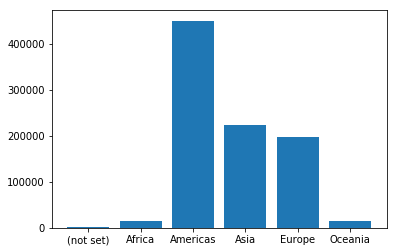

In [12]:
plt.bar(totalContinentVisited.index, totalContinentVisited)

#Using plotly, Total number of sub-Continent visited

data = [go.Bar(
            x=totalContinentVisited.index,
            y=totalContinentVisited
    )]

layout = go.Layout(
    title='Total visits by every continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total continent visited')


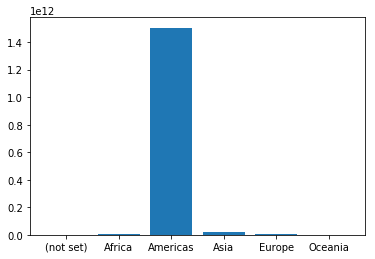

In [13]:
plt.bar(totalContinentPurchased.index, totalContinentPurchased)

data = [go.Bar(
            x=totalContinentPurchased.index,
            y=totalContinentPurchased
    )]

layout = go.Layout(
    title='Total purchased by every continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total continent purchased')

**Visualization of different parameters on the basis of sub-continent**

<BarContainer object of 6 artists>

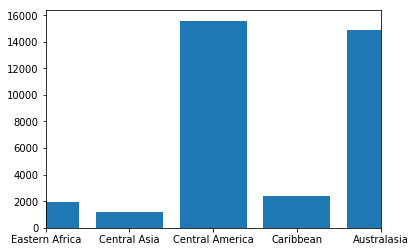

In [14]:
plt.xlim(5)
plt.bar(totalsubContinentVisited.index[:6], totalsubContinentVisited[:6])

In [15]:
#Using plotly, Total number of sub-Continent visited

data = [go.Bar(
            x=totalsubContinentVisited.index,
            y=totalsubContinentVisited
    )]

layout = go.Layout(
    title='Total visits by every sub-continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total sub-Continent visited')


In [16]:
#Using plotly, Total number of sub-Continent purchased

data = [go.Bar(
            x=totalsubContinentPurchased.index,
            y=totalsubContinentPurchased
    )]

layout = go.Layout(
    title='Total purchased by every sub-continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total sub-Continent purchased')

<BarContainer object of 6 artists>

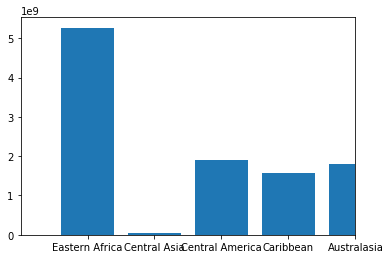

In [17]:
plt.xlim(6)
plt.bar(totalsubContinentPurchased.index[:6], totalsubContinentPurchased[:6])

**On the basis of Browser**

In [18]:
totalVisitsBrowser = train_data.groupby('device.browser')['totals.visits'].sum()
print("Total number of browsers used by users : ",totalVisitsBrowser.size)

totalPurchasedBrowser = train_data.groupby('device.browser')['totals.transactionRevenue'].sum()
print("Total number of browsers through users purchased : ",totalPurchasedBrowser.size)

Total number of browsers used by users :  54
Total number of browsers through users purchased :  54


In [19]:
data = [go.Bar(
            x=totalVisitsBrowser.index,
            y=totalVisitsBrowser
    )]

layout = go.Layout(
    title='Total visited by every browser',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total Browsers visited')

data = [go.Bar(
            x=totalPurchasedBrowser.index,
            y=totalPurchasedBrowser
    )]

layout = go.Layout(
    title='Total purchased by every browser',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total Browsers purchased')


In [20]:
totalDeviceUsed = train_data.groupby('device.deviceCategory')['totals.visits'].sum()
print("Category of devices used by users : ",totalDeviceUsed.size)

data = [go.Bar(
            x=totalDeviceUsed.index,
            y=totalDeviceUsed
    )]

layout = go.Layout(
    title='Total devices all users used',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total devices visited')


totalDevicePurchased = train_data.groupby('device.deviceCategory')['totals.transactionRevenue'].sum()
print("Category of devices used by users : ",totalDevicePurchased.size)

data = [go.Bar(
            x=totalDevicePurchased.index,
            y=totalDevicePurchased
    )]

layout = go.Layout(
    title='Total devices all users purchased from',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total devices purchased')


Category of devices used by users :  3


Category of devices used by users :  3


In [21]:
totalOSUsed = train_data.groupby('device.operatingSystem')['totals.visits'].sum()
print("Category of Operating Systems used by users : ",totalOSUsed.size)

data = [go.Bar(
            x=totalOSUsed.index,
            y=totalOSUsed
    )]

layout = go.Layout(
    title='Total OS used by users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total OS used for visited')


totalOSPurchased = train_data.groupby('device.operatingSystem')['totals.transactionRevenue'].sum()
print("Category of OS purchased by users : ",totalOSPurchased.size)

data = [go.Bar(
            x=totalOSPurchased.index,
            y=totalOSPurchased
    )]

layout = go.Layout(
    title='Total OS used by purchased users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total OS purchased')


Category of Operating Systems used by users :  20


Category of OS purchased by users :  20


In [22]:
totalCityVisited = train_data.groupby('geoNetwork.city')['totals.visits'].sum()
print("Total number of cities visited by users : ",totalCityVisited.size)

data = [go.Bar(
            x=totalCityVisited.index,
            y=totalCityVisited
    )]

layout = go.Layout(
    title='Total cities visited by users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of visited users')


totalCityPurchased = train_data.groupby('geoNetwork.city')['totals.transactionRevenue'].sum()
print("Total number of cities purchased by users : ",totalCityPurchased.size)

data = [go.Bar(
            x=totalCityPurchased.index,
            y=totalCityPurchased
    )]

layout = go.Layout(
    title='Total cities by purchased users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total cities purchased')


Total number of cities visited by users :  649


Total number of cities purchased by users :  649


In [23]:

totalRegionVisited = train_data.groupby('geoNetwork.region')['totals.visits'].sum()
print("Total number of regions visited by users : ",totalRegionVisited.size)

data = [go.Bar(
            x=totalRegionVisited.index,
            y=totalRegionVisited
    )]

layout = go.Layout(
    title='Total regions visited by users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of visited users')


totalRegionPurchased = train_data.groupby('geoNetwork.region')['totals.transactionRevenue'].sum()
print("Total number of regions purchased by users : ",totalRegionPurchased.size)

data = [go.Bar(
            x=totalRegionPurchased.index,
            y=totalRegionPurchased
    )]

layout = go.Layout(
    title='Total cities by purchased users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total cities purchased')


Total number of regions visited by users :  376


Total number of regions purchased by users :  376


In [34]:
totalHitsVisited = train_data.groupby('totals.hits')['totals.visits'].sum()
print("Total number of hits by visiters : ",totalHitsVisited.size)

data = [go.Bar(
            x=totalHitsVisited.index,
            y=totalHitsVisited
    )]

layout = go.Layout(
    title='Total hits by visiters',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of hits by visiters')


totalHitsPurchased = train_data.groupby('totals.hits')['totals.transactionRevenue'].sum()
print("Maximum number of hits by purchasers : ",totalHitsPurchased.max())

data = [go.Bar(
            x=totalHitsPurchased.index,
            y=totalHitsPurchased
    )]

layout = go.Layout(
    title='Total hits by purchasers',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total hits purchased')


Total number of hits by visiters :  274


Maximum number of hits by purchasers :  39547520000.0


In [58]:
train_data.groupby('totals.pageviews')['totals.visits'].sum()

totalPagesVisited = train_data['totals.pageviews'].value_counts()
print("Total number of Pages visited by visiters : ",totalPagesVisited.size)

data = [go.Bar(
            x=totalPagesVisited.index,
            y=totalPagesVisited
    )]

layout = go.Layout(
    title='Total hits by visiters',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of page views by visiters')


totalHitsPurchased = train_data.groupby('totals.pageviews')['totals.transactionRevenue'].sum()
print("Maximum number of page visited by purchasers : ",totalHitsPurchased.max())

data = [go.Bar(
            x=totalHitsPurchased.index,
            y=totalHitsPurchased
    )]

layout = go.Layout(
    title='Total page views by purchasers',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total page views purchased')


Total number of Pages visited by visiters :  213


Maximum number of page visited by purchasers :  50568120000.0


In [85]:

totalChannel = train_data.groupby('channelGrouping')['totals.visits'].sum()
print("Total number of channels grouping : ",totalChannel.size)

data = [go.Bar(
            x=totalChannel.index,
            y=totalChannel
    )]

layout = go.Layout(
    title='Total channel grouping',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total channel grouping')



totalChannelPurchased = train_data.groupby('channelGrouping')['totals.transactionRevenue'].sum()
print("Total number of channels grouping p : ",totalChannelPurchased.size)

data = [go.Bar(
            x=totalChannelPurchased.index,
            y=totalChannelPurchased
    )]

layout = go.Layout(
    title='Total channel grouping',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total channel grouping')


Total number of channels grouping :  8


Total number of channels grouping :  8


**Missing values**

In [83]:
#Checking how many columns are missing in all feature set

miss_per = {}
for k, v in dict(train_data.isna().sum(axis=0)).items():
    if v == 0:
        continue
    miss_per[k] = 100 * float(v) / len(train_data)
    
    
import operator 
sorted_x = sorted(miss_per.items(), key=operator.itemgetter(1), reverse=True)
print ("There are " + str(len(miss_per)) + " columns with missing values")

kys = [_[0] for _ in sorted_x]
vls = [_[1] for _ in sorted_x]

trace1 = go.Bar(y = kys[::-1], orientation="h" , x = vls[::-1], marker=dict(color="#d6a5ff"))
layout = go.Layout(title="Missing Values Percentage", 
                   xaxis=dict(title="Missing Percentage"), 
                   height=400, margin=dict(l=300, r=300))
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

There are 14 columns with missing values
